## Bunker Oil Concentration Notebook

Sixth figure request for Stephanie


In [1]:
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as mcm
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import xarray as xr

%matplotlib inline

In [2]:
landcolour = 'papayawhip'
plt.rcParams['font.size'] = 15

In [3]:
#mesh = xr.open_dataset('~/MEOPAR/grid/mesh_mask201702.nc')
mesh = xr.open_dataset('/home/sallen/Documents/MEOPAR/grid/mesh_mask201702.nc')
tmask = 1- mesh.tmask[0, 0]

In [4]:
#data3d = xr.open_dataset('/data/sallen/results/MIDOSS/Monte_Carlo/first240_oilpresence.nc')
data3d = xr.open_dataset('~/Documents/MIDOSS/MIDOSS_aggregated_merged.nc')

In [5]:
jmin, jmax = data3d.x.values[0]+1, data3d.x.values[-1]+2
imin, imax = data3d.y.values[0]+1, data3d.y.values[-1]+2

In [6]:
data3d.OilWaterColumnOilVol_surface_conc

<xarray.DataArray 'OilWaterColumnOilVol_surface_conc' (RunId: 723, y: 270, x: 240)>
[46850400 values with dtype=float64]
Coordinates:
  * RunId    (RunId) object 'A-0' 'A-1' 'A-10' 'A-11' ... 'E-97' 'E-98' 'E-99'
  * y        (y) int64 500 501 502 503 504 505 506 ... 764 765 766 767 768 769
  * x        (x) int64 100 101 102 103 104 105 106 ... 334 335 336 337 338 339

WaterColumnOilVol_surface_presence.values is the maximum value in time at the surface at a given i, j for a given run.

In [31]:
oil_array = data3d.OilWaterColumnOilVol_surface_presence[data3d.OilType=='bunker'].mean(axis=0)
oil_array.max()

<xarray.DataArray 'OilWaterColumnOilVol_surface_presence' ()>
array(50.34467937)

In [32]:
oil = np.ma.masked_array(oil_array, oil_array < 0.001)  #mask anything too small
print (oil.mask.min())

False


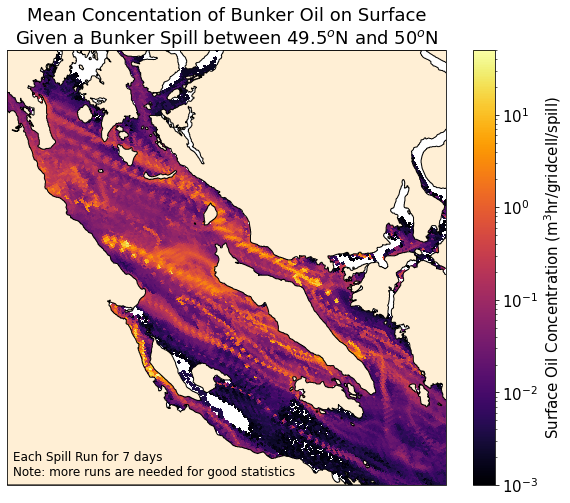

In [38]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil,
    transform=crs.PlateCarree(), zorder=0, cmap='inferno', norm=colors.LogNorm(vmin=0.001, vmax=50)
)

cb = fig.colorbar(C, ax=ax);
cb.set_label('Surface Oil Concentration (m$^3$hr/gridcell/spill)')
ax.set_title("Mean Concentation of Bunker Oil on Surface\nGiven a Bunker Spill between 49.5$^o$N and 50$^o$N");
ax.text(-125.28, 49.32, 'Each Spill Run for 7 days\nNote: more runs are needed for good statistics',
       transform=crs.PlateCarree(), fontsize=12)
fig.savefig('VolumeBunker_3F_pcolor.png')

In [28]:
s = 5
oil_array = data3d.OilWaterColumnOilVol_surface_presence
smooth = oil_array*0.
for kk in range(oil_array.shape[0]):
#    if int(kk/10)*10 == kk:
#        print (kk)
    smooth[kk] = gaussian_filter(oil_array[kk], s)

In [29]:
oil = np.ma.masked_array(smooth, smooth < 0.001).mean(axis=0)  #mask anything too small
print (oil.mask.min())

False


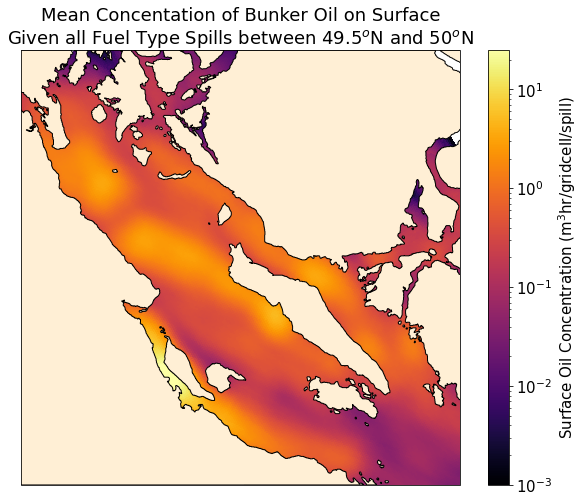

In [30]:
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-125.3, -123.9], [49.3, 50.2]
ax = plt.axes(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
C = ax.pcolormesh(
    mesh.nav_lon[imin:imax, jmin:jmax], mesh.nav_lat[imin:imax, jmin:jmax], oil,
    transform=crs.PlateCarree(), zorder=0, cmap='inferno', norm=colors.LogNorm(vmin=0.001, vmax=25)
)

cb = fig.colorbar(C, ax=ax);
cb.set_label('Surface Oil Concentration (m$^3$hr/gridcell/spill)')
ax.set_title("Mean Concentation of Bunker Oil on Surface\nGiven all Fuel Type Spills between 49.5$^o$N and 50$^o$N");